
# Clustering: Application to Fashion MNIST

In this example, we will use the K-means clustering technique to explore a "unknown" dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of dataset. 


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

## A quick look to the dataset

The full description of this datset is available following the URL:
https://www.kaggle.com/datasets/zalando-research/fashionmnist


The number of images = 10000
The number of classes = 10


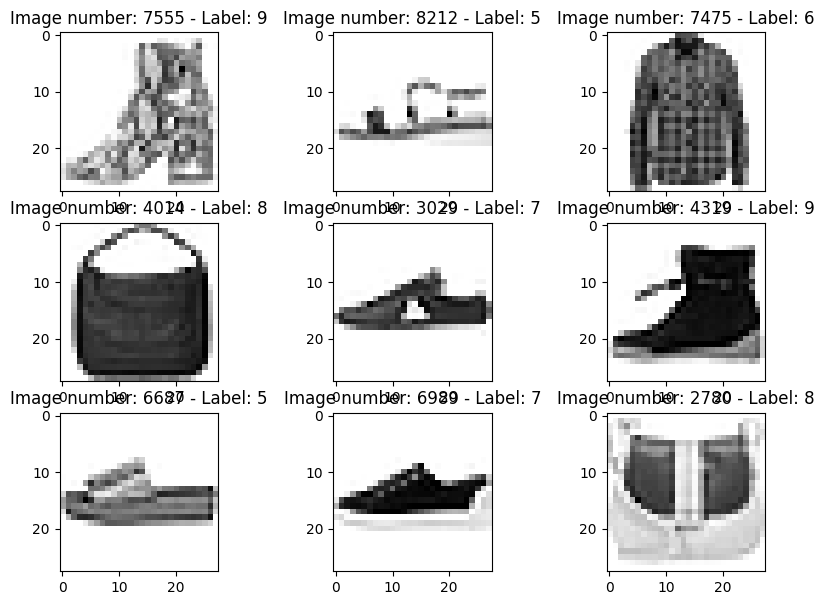

In [5]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()                                         
    j=j+1

plt.show()



## Preprocessing the dataset using PCA 

PCA is used in order to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Here, we :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.


In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)

print("Original dimension of the dataset (before PCA)  = " + str(Xn.shape[1]))
print("Number of dimensions after PCA (0.90) = " + str(pca.n_components_)) 


Original dimension of the dataset (before PCA)  = 784
Number of dimensions after PCA (0.90) = 82


## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [7]:
target_nb_clusts = 1000

k_means = KMeans(n_clusters=target_nb_clusts).fit(Xn_r)
nb_clusts = k_means.cluster_centers_.shape[0]

print("The numbers of k-means resulting clusters is ", nb_clusts)

/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  1000


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

In [8]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)


In order to assess the quality of produced clusters, here we will visualize the content of few clusters. 

Clust is the variable in which we set the cliuster to visualize

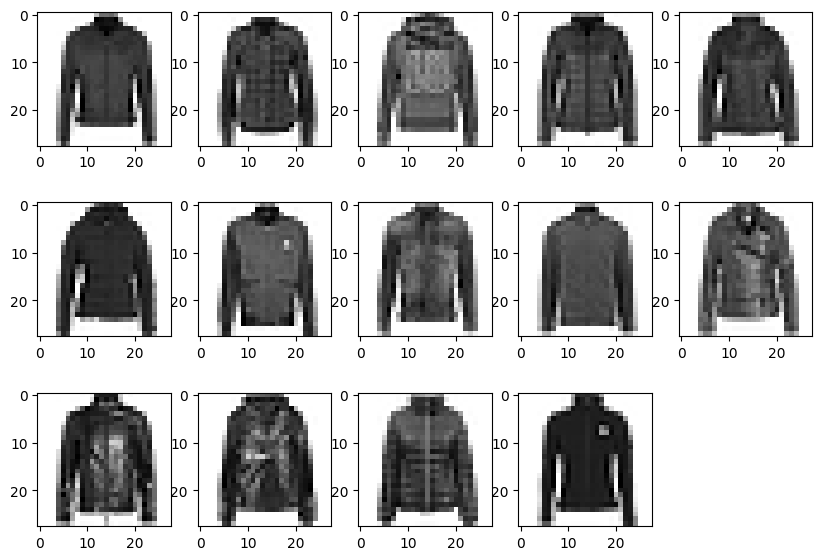

In [9]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 12 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

plt.show()

We can even plot the histogram of the class labels of vectors contained in the cluster.

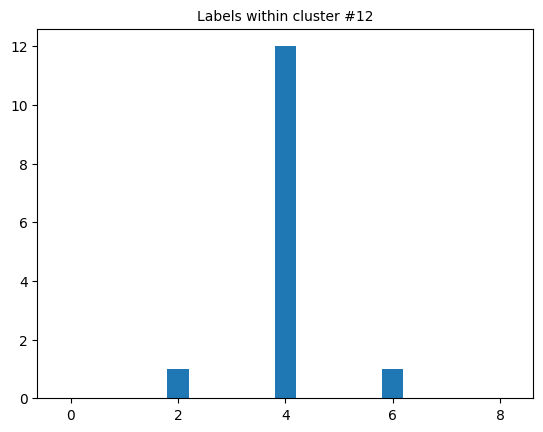

In [10]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()


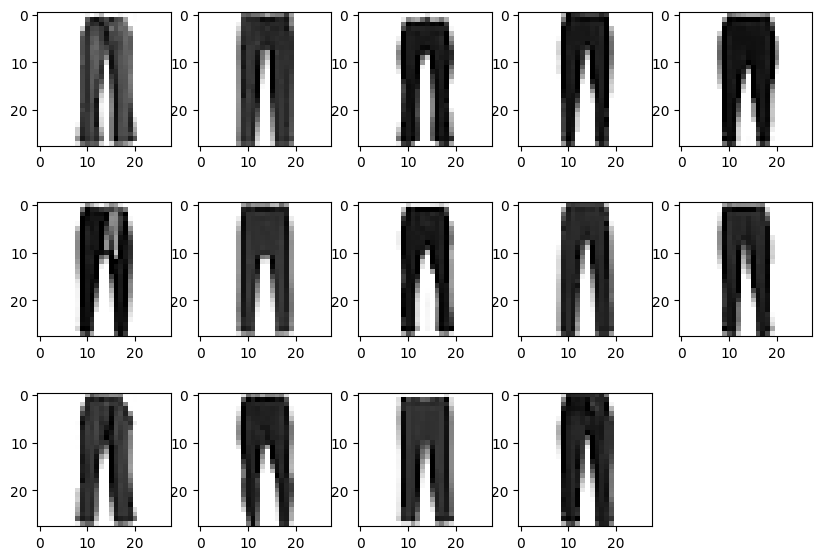

In [11]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 5 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1


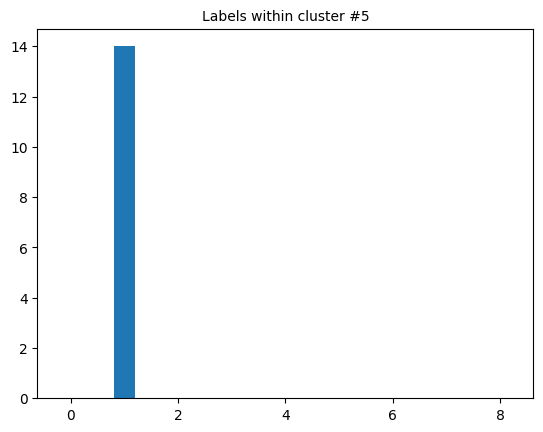

In [12]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

b## Further experiments:
#### - Perform the clustering using a value of k equals to the number of classes in the dataset, i.e. k = 10. What do you notice?

#### - Perform again the clustering (k=1000) without the preprocessing step using PCA, i.e. without any dimensionality reduction? Analyse the result and compare it to the result with PCA.

#### - If you perform two different clustering (varying internal parameters: k, with/without PCA...), how can you compare the quality of the resulting clusters? Try to propose an measure for that.

...

### the clustering using a value of k equals to the number of classes in the dataset, i.e. k = 10. What do you notice?

In [13]:
target_nb_clusts = 10

k_means = KMeans(n_clusters=target_nb_clusts).fit(Xn_r)

nb_clusts = k_means.cluster_centers_.shape[0]

print("The numbers of k-means resulting clusters is ", nb_clusts)

/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  10


In [14]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)

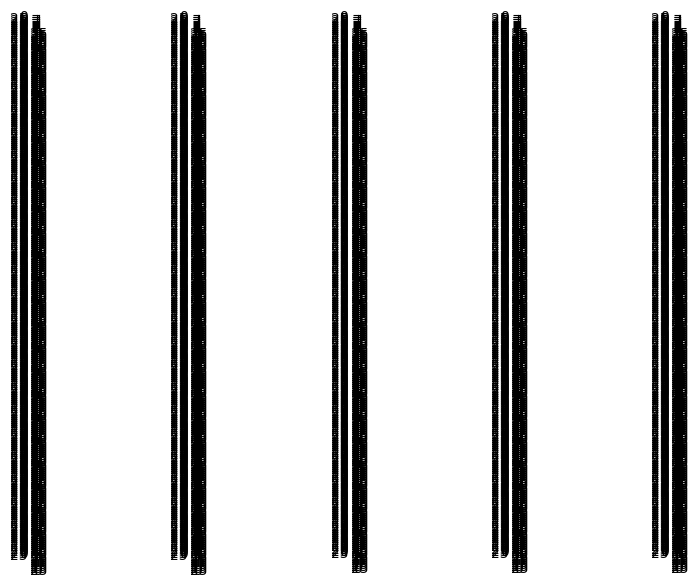

In [15]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 5 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

plt.show()

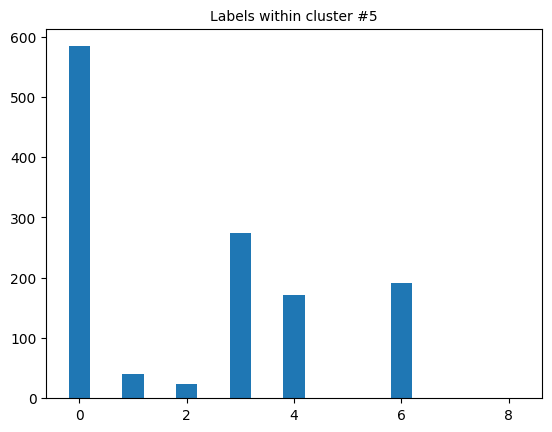

In [16]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

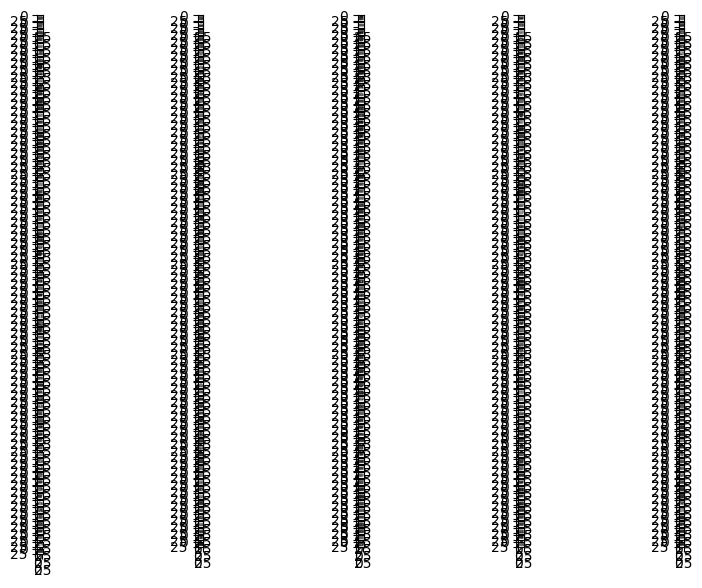

In [17]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 9 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

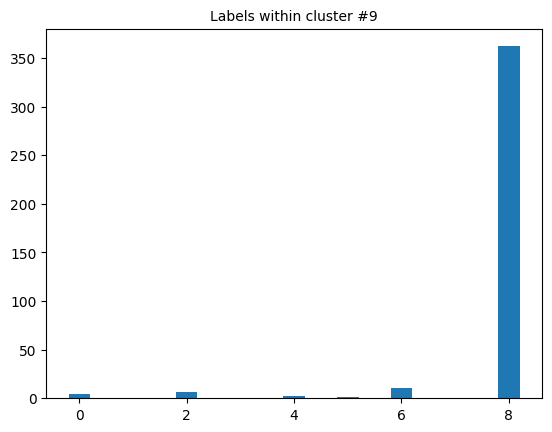

In [18]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

We can see that the number of class labels of vectors per cluster increase when the number of clusters is decreased. Which can then lead to more meaningful and relevant clusters.

### Perform again the clustering (k=1000) without the preprocessing step using PCA, i.e. without any dimensionality reduction? Analyse the result and compare it to the result with PCA.

In [19]:
target_nb_clusts = 1000

k_means = KMeans(n_clusters=target_nb_clusts).fit(Xn)
nb_clusts = k_means.cluster_centers_.shape[0]

print("The numbers of k-means resulting clusters is ", nb_clusts)

/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  1000


In [20]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)

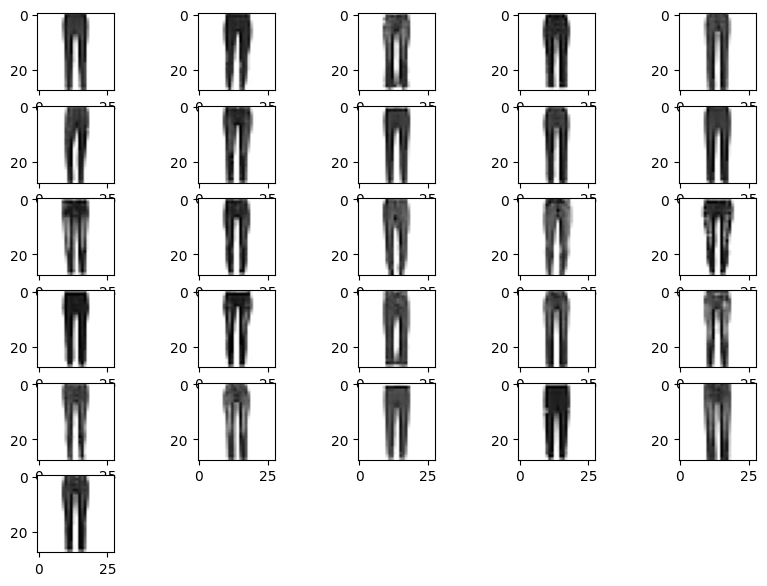

In [21]:
fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 12 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

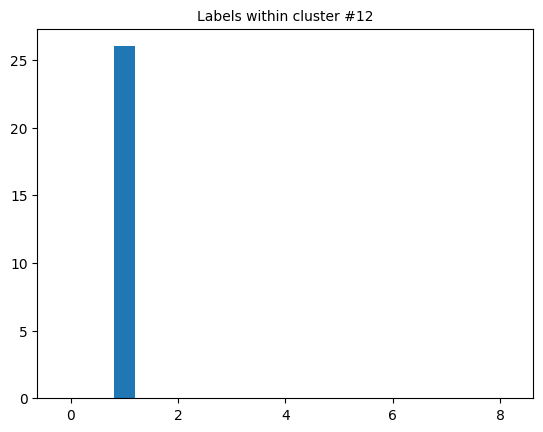

In [22]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

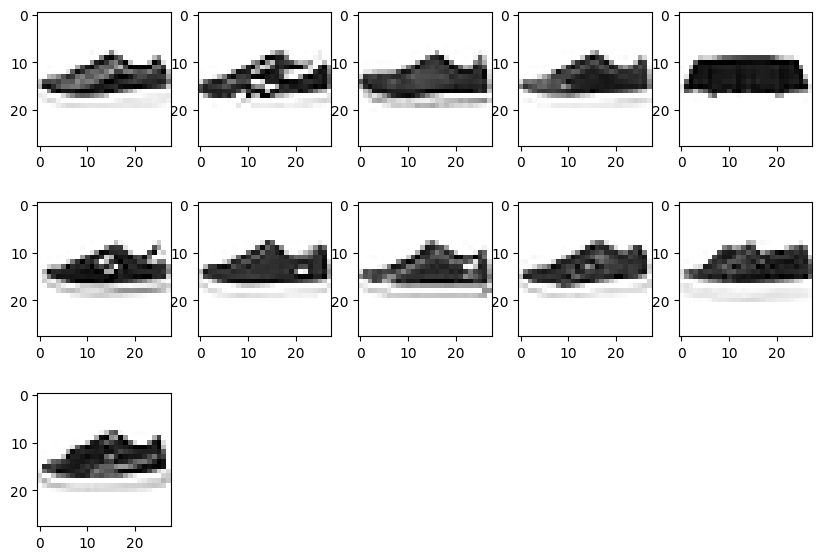

In [23]:
fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 5 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

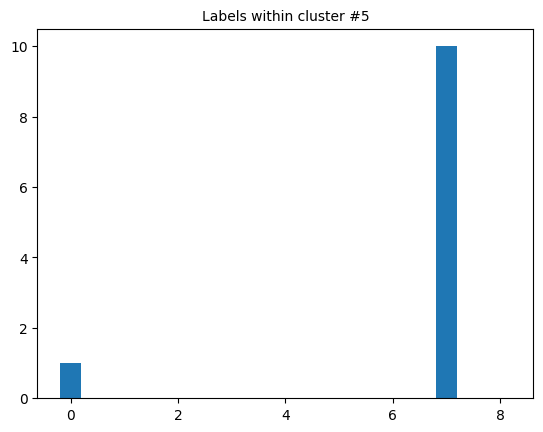

In [24]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

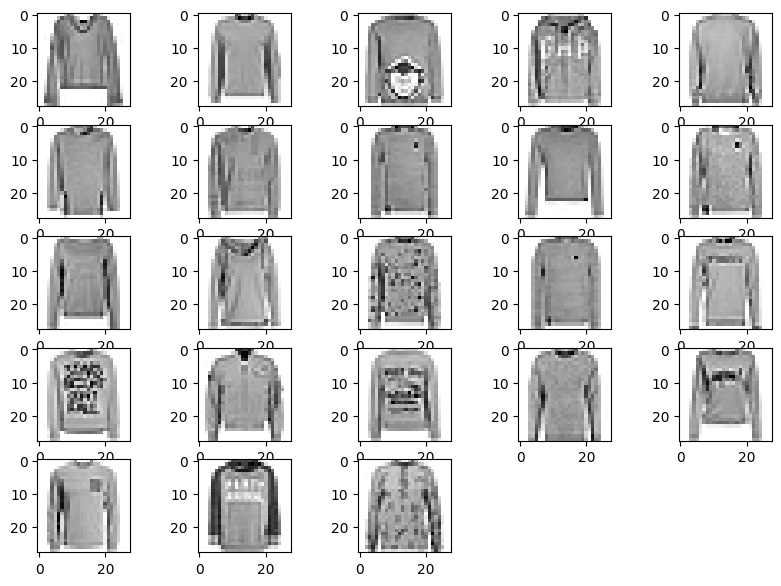

In [25]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 9 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

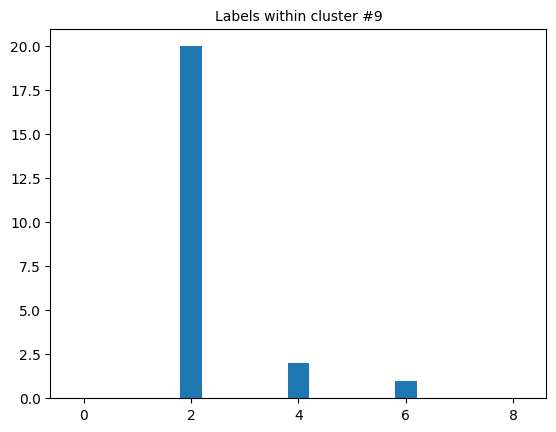

In [26]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()

#### Clustering with K-means without PCA : 
- Preserving Original Features: when KMeans is performed on the full-dimensional space of the original data, preserving all the original features.
- More Detailed Clustering: As we can see from the 03 clusters randomly choosen previously, clusters do capture more detailed patterns in the data ; leading to less meaningful clusters.
- Computational Complexity: Without dimensionality reduction, the computational complexity is higher. Which make the algorithm slower and memory-consuming.

#### - If you perform two different clustering (varying internal parameters: k, with/without PCA...), how can you compare the quality of the resulting clusters? Try to propose an measure for that.

Comparing the quality of clusters obtained from different runs of K-means (with varying kk or preprocessing steps) can be done using metrics such as:

- `Inertia:` It is the sum of squared distances of samples to their closest cluster center. Lower inertia means denser clusters (but not necessarily better if clusters are too dense).
- `Silhouette Score:` It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

To compare the quality of resulting clusters for example, we are more interested in the properties of the clusters themselves, regardless of any true labels, metrics like inertia or silhouette score might be more informative.

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Pour le clustering avec PCA
kmeans_pca = KMeans(n_clusters=10)  # ou le nombre de clusters que vous avez choisi
kmeans_pca.fit(Xn)
clusters_pca = kmeans_pca.labels_

# Pour le clustering sans PCA
kmeans_no_pca = KMeans(n_clusters=10)  # même nombre de clusters pour une comparaison équitable
kmeans_no_pca.fit(Xn_r)
clusters_no_pca = kmeans_no_pca.labels_

silhouette_pca = silhouette_score(Xn, clusters_pca)
silhouette_no_pca = silhouette_score(Xn_r, clusters_no_pca)

print(f"Silhouette Score with PCA: {silhouette_pca}")
print(f"Silhouette Score without PCA: {silhouette_no_pca}")

# You can also calculate the inertia directly from the KMeans object:
inertia_pca = kmeans_pca.inertia_
inertia_no_pca = kmeans_no_pca.inertia_

print(f"Inertia with PCA: {inertia_pca}")
print(f"Inertia without PCA: {inertia_no_pca}")

/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score with PCA: 0.15398478645539956
Silhouette Score without PCA: 0.1749569895322677
Inertia with PCA: 20747552920.43731
Inertia without PCA: 16343277937.984087


/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samuel/Bureau/Github/S9_el_tegy_samuel_ladibe/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samuel/Bureau/Github/S9_el_tegy_samuel_l

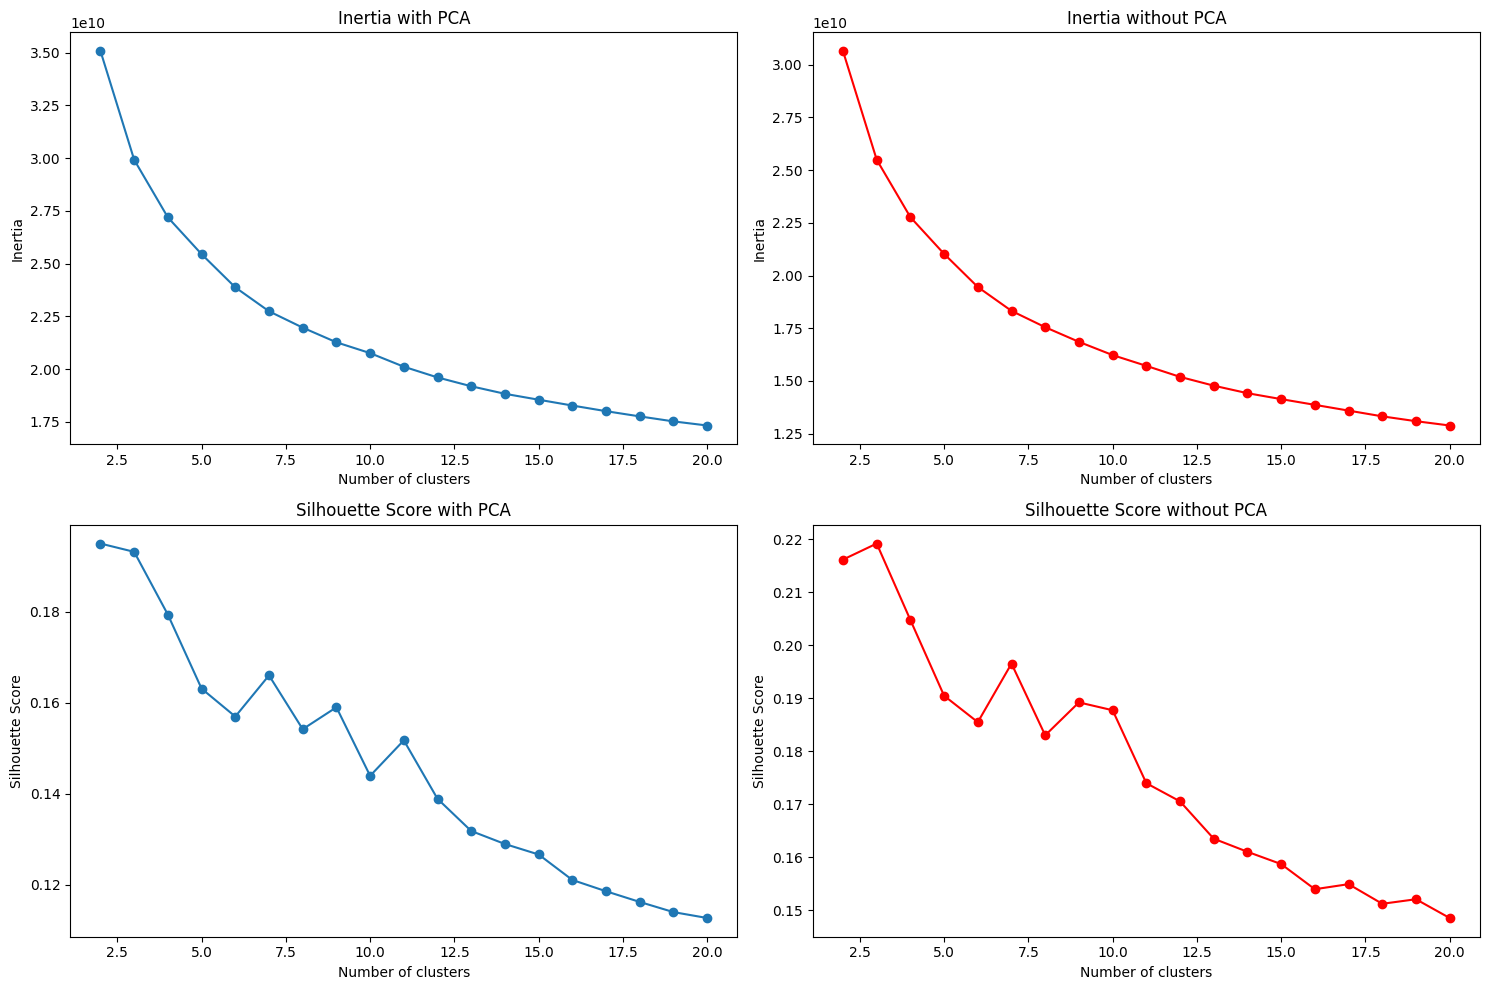

In [29]:
# Define the range of k values to test
k_values = range(2, 21)  # For example, from 2 to 20

# Initialize lists to store the results
inertia_values_pca = []
silhouette_scores_pca = []
inertia_values_no_pca = []
silhouette_scores_no_pca = []

# Compute metrics for the PCA-reduced data
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42).fit(Xn)
    inertia_values_pca.append(kmeans_pca.inertia_)
    silhouette_scores_pca.append(silhouette_score(Xn, kmeans_pca.labels_))

# Compute metrics for the original data
for k in k_values:
    kmeans_no_pca = KMeans(n_clusters=k, random_state=42).fit(Xn_r)
    inertia_values_no_pca.append(kmeans_no_pca.inertia_)
    silhouette_scores_no_pca.append(silhouette_score(Xn_r, kmeans_no_pca.labels_))

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Inertia plots
ax[0, 0].plot(k_values, inertia_values_pca, marker='o')
ax[0, 0].set_title('Inertia with PCA')
ax[0, 0].set_xlabel('Number of clusters')
ax[0, 0].set_ylabel('Inertia')

ax[0, 1].plot(k_values, inertia_values_no_pca, marker='o', color='r')
ax[0, 1].set_title('Inertia without PCA')
ax[0, 1].set_xlabel('Number of clusters')
ax[0, 1].set_ylabel('Inertia')

# Silhouette score plots
ax[1, 0].plot(k_values, silhouette_scores_pca, marker='o')
ax[1, 0].set_title('Silhouette Score with PCA')
ax[1, 0].set_xlabel('Number of clusters')
ax[1, 0].set_ylabel('Silhouette Score')

ax[1, 1].plot(k_values, silhouette_scores_no_pca, marker='o', color='r')
ax[1, 1].set_title('Silhouette Score without PCA')
ax[1, 1].set_xlabel('Number of clusters')
ax[1, 1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Inertia Analysis:

For both scenarios, the inertia decreases as the number of clusters increases. This is expected because having more clusters means that each cluster is likely to be smaller, making the sum of squared distances from points to their centroids smaller.

The inertia is consistently higher with PCA compared to without PCA. This could be due to the data compression losing some variance, which leads to less tight clusters.

Silhouette Score Analysis:

The silhouette score fluctuates as the number of clusters increases. This indicates that the compactness and separation of the clusters vary significantly with the number of clusters.

With PCA, the silhouette score tends to decrease as the number of clusters increases, suggesting that the cluster quality is deteriorating—clusters are less cohesive and more overlapping.

Without PCA, the silhouette score initially decreases, then fluctuates. The fluctuations might indicate that for certain numbers of clusters, the natural grouping of the data is better captured even in the high-dimensional space.

## Your final report here:

Without PCA: The clustering shows a slightly better silhouette score, which suggests that preserving the original feature space might allow the K-means algorithm to capture more natural groupings in the data. However, this comes at the cost of higher computational complexity due to the larger number of dimensions.

With PCA: Despite the lower silhouette scores, using PCA might be beneficial when considering computational efficiency and when dealing with the curse of dimensionality. The reduction in dimensions can lead to faster computations and less memory usage, which is important for large datasets or real-time applications.

Optimal Number of Clusters: Neither set of plots shows a clear "elbow" or peak that would indicate an optimal number of clusters. This could suggest that we have to update the tested range to find out the range that plot the elbow, because the actual range(2,21) doesn't return a clear elbow or peak.